In [1]:
import mlrose_hiive as mh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import random
from random import randint
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
np.random.seed(44)

In [2]:
len_s, len_e = 20, 200

## function to generate edges for ...?

In [3]:
def gen_edges(dims, nsamp):
    perm = np.indices(dims).reshape(len(dims), -1).T
    idx = np.random.choice(perm.shape[0], nsamp, replace=False)
    return perm.take(idx, axis=0)

In [4]:
def get_coords(s, r):
    temp = np.random.rand(s, 2) * r
    coords =[]
    for i in temp:
        coords.append([int(i[0]),int(i[1])])
    return coords

In [5]:
alist =[]
for i in range(len_e-len_s):
    alist.append(get_coords(5,5))

## function to make smooth curves

In [6]:
def smooth(array, window, poly_deg):
    return savgol_filter(array, window, poly_deg)

## function to create time plots

In [7]:
def time_plot(rhc_rt_array, sa_rt_array, ga_rt_array, mimic_rt_array,title):
    window = 9
    mimic_smooth = smooth(mimic_rt_array, window, 3)
    sa_smooth = smooth(sa_rt_array, window, 3)
    ga_smooth = smooth(ga_rt_array, window, 3)
    rhc_smooth = smooth(rhc_rt_array, window, 3)
    x= np.arange(len_s, len_e,1)
    plt.plot(x, sa_rt_array, '.', label='Simulated Annealing', color='lime')
    plt.plot(x, ga_rt_array, '.', label='Genetic Algorithm', color='blueviolet')
    plt.plot(x, rhc_rt_array, '.', label='Random Hill Climb', color='gold')
    plt.plot(x, mimic_rt_array, '.', label='MIMIC', color='orangered')
    plt.plot(x,mimic_smooth, color='orangered')
    plt.plot(x,sa_smooth, color='lime')
    plt.plot(x,ga_smooth, color='blueviolet')
    plt.plot(x,rhc_smooth, color='gold')
    plt.xlabel('Problem Length')
    plt.ylabel('Run Time')
    plt.title(title)
    plt.savefig('img/'+title+'.png')
    plt.legend()
    plt.show()

## function to create fitness plots

In [8]:
def fit_plot(rhc_fit_array, sa_fit_array, ga_fit_array, mimic_fit_array, title):
    plt.plot(np.arange(len_s, len_e,1), sa_fit_array,'o-', color='lime', label='Simulated Annealing')
    plt.plot(np.arange(len_s, len_e,1), ga_fit_array,'o-', color='blueviolet',label='Genetic Algorithm')
    plt.plot(np.arange(len_s, len_e,1), rhc_fit_array,'o-', color='gold',label='Random Hill Climb')
    plt.plot(np.arange(len_s, len_e,1), mimic_fit_array,'o-', color='orangered',label='MIMIC')
    plt.xlabel('Problem Length')
    plt.ylabel('Best Fitness')
    plt.legend()
    plt.title(title)
    plt.savefig('img/'+title+'.png')
    plt.show()

## this cell code will run all problems and all algorithms and will plot the curves

Running: Four Peaks RHC
Running: Four Peaks SA
Running: Four Peaks GA
Running: Four Peaks MIMIC


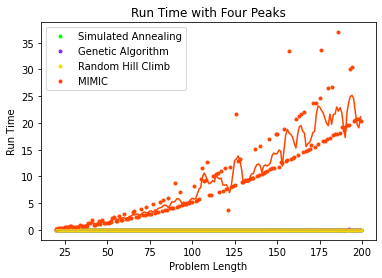

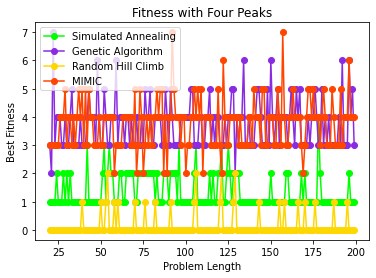

Running: Queens RHC
Running: Queens SA
Running: Queens GA
Running: Queens MIMIC


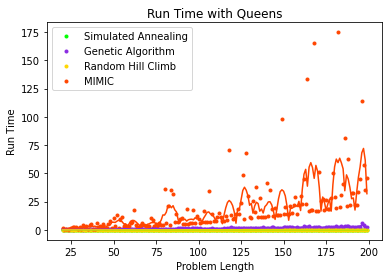

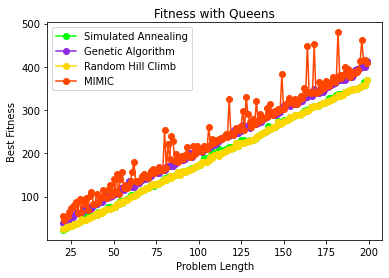

Running: FlipFlop RHC
Running: FlipFlop SA
Running: FlipFlop GA
Running: FlipFlop MIMIC


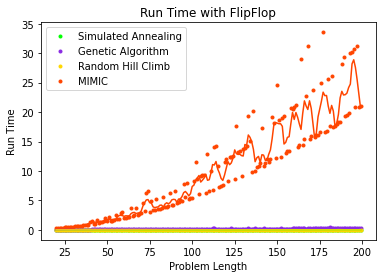

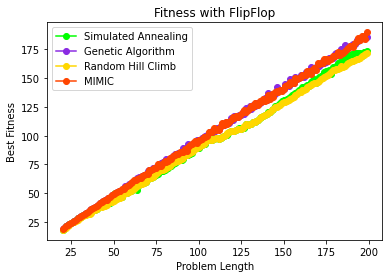

In [9]:
pd_list = ['fp','q','ff']
alg_list = ['rhc','sa','ga','mimic']
k = 0
title = []
p = len_s
for i in pd_list:
    if i == 'fp':
        fitness = mh.FourPeaks()
        fn = 'Four Peaks'
    elif i == 'q':
        fitness = mh.Queens()
        fn = 'Queens'
    elif i == 'ff':
        fitness = mh.FlipFlop()
        fn = 'FlipFlop'
    rhc_fit_array, rhc_rt_array = [] , []
    sa_fit_array, sa_rt_array = [], []
    ga_fit_array, ga_rt_array = [], []
    mimic_fit_array, mimic_rt_array = [], []
    for l in alg_list:
        for j in range(len_s, len_e):
            
            problem = mh.DiscreteOpt(length=j,
                         fitness_fn=fitness,
                         maximize=True,
                         max_val=8)
            if l == 'rhc':
                st = time.perf_counter()
                best_state, best_fitness, _ = mh.random_hill_climb(problem, 
                                                                   max_attempts=1,
                                                                   max_iters=10000,
                                                                   random_state=1)
                et = time.perf_counter() - st
                rhc_fit_array.append(best_fitness)
                rhc_rt_array.append(et)
                an = fn + ' RHC'
                k+=1
            elif l == 'sa':
                schedule = mh.ExpDecay()
                st = time.perf_counter()
                best_state, best_fitness, _ = mh.simulated_annealing(problem, schedule=schedule,
                                                                     max_attempts=1,
                                                                     max_iters=10000,
                                                                     random_state=1)
                et = time.perf_counter() - st
                sa_fit_array.append(best_fitness)
                sa_rt_array.append(et)
                an = fn + ' SA'
                k+=1
            elif l == 'ga':
                st = time.perf_counter()
                best_state, best_fitness, _ = mh.genetic_alg(problem, 
                                                             max_attempts=1,
                                                             max_iters=10000,
                                                             random_state=1,
                                                             elite_dreg_ratio=1)
                et = time.perf_counter() - st
                ga_fit_array.append(best_fitness)
                ga_rt_array.append(et)
                an = fn + ' GA'
                k+=1
            elif l == 'mimic':
                st = time.perf_counter()
                best_state, best_fitness, _ = mh.mimic(problem, 
                                                       max_attempts=1,
                                                       max_iters=1000,
                                                       random_state=1)
                et = time.perf_counter() - st
                mimic_fit_array.append(best_fitness)
                mimic_rt_array.append(et)
                an = fn + ' MIMIC'
                k+=1
        print('Running: '+ an)
    if k == 40 or 80 or 120:
        rt = "Run Time with " + fn
        ft = "Fitness with "+ fn
        time_plot(rhc_rt_array, sa_rt_array, ga_rt_array, mimic_rt_array, rt)
        fit_plot(rhc_fit_array, sa_fit_array, ga_fit_array, mimic_fit_array, ft)
                